In [1]:
# loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
datasets = ['train', 'val', 'test']
loaded_data = {}
for dataset in datasets:
    loaded_data[f'{dataset}'] = pd.read_csv(f'E:/Coding/Applied Machine Learning/02-experimental-tracking/data/prepared/{dataset}.csv')

# Accessing the loaded datasets:
train_X = loaded_data['train'].text
train_y = loaded_data['train'].spam
val_X = loaded_data['val'].text
val_y = loaded_data['val'].spam
test_X = loaded_data['test'].text
test_y = loaded_data['test'].spam

In [5]:
def train_models(train_X, train_y):
    # XGBoost model
    xgb_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', XGBClassifier(random_state=1))
    ])
    xgb_pipeline.fit(train_X, train_y)

    # Logistic Regression model
    lr_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', LogisticRegression(random_state=1))
    ])
    lr_pipeline.fit(train_X, train_y)

    # Multinomial Naive Bayes model
    nb_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', MultinomialNB())
    ])
    nb_pipeline.fit(train_X, train_y)

    return xgb_pipeline, lr_pipeline, nb_pipeline

In [6]:
# function for evaluating the models
def evaluate_models(pipelines, val_X, val_y):
    results = {}
    for name, pipeline in pipelines.items():
        predictions = pipeline.predict(val_X)
        accuracy = accuracy_score(val_y, predictions)
        results[name] = accuracy
        print(f'{name} Accuracy: {accuracy:.4f}')
    return results

In [8]:
xgb_pipeline, lr_pipeline, nb_pipeline = train_models(train_X, train_y)

In [10]:
# Storing the pipelines in a dictionary for easy reference
pipelines = {
    'XGBoost': xgb_pipeline,
    'Logistic Regression': lr_pipeline,
    'Multinomial Naive Bayes': nb_pipeline
}

# Evaluate models on validation data
evaluation_results = evaluate_models(pipelines, val_X, val_y)

XGBoost Accuracy: 0.9764
Logistic Regression Accuracy: 0.9773
Multinomial Naive Bayes Accuracy: 0.9581


# **Since XGBoost performed exceptionally well on the evaluation data, let's retrain the model and assess its accuracy on the test set.**

In [11]:
# Train an XGBoost model with TF-IDF vectorization
def train_xgboost(train_X, train_y):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000)),
        ('clf', XGBClassifier(random_state=1))
    ])
    pipeline.fit(train_X, train_y)
    return pipeline

In [16]:
best_model = train_xgboost(train_X, train_y)

In [17]:
# Evaluate the model and display results
def evaluate_model(model, test_X, test_y):

    # Evaluate the best model on the test data
    best_model = model
    test_accuracy = best_model.score(test_X, test_y)
    print("Test Accuracy with Best Model: ", test_accuracy)

    y_pred = model.predict(test_X)
    confusion = confusion_matrix(test_y, y_pred)
    report = classification_report(test_y, y_pred, target_names=["Class 0", "Class 1"])

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(report)

Test Accuracy with Best Model:  0.9790575916230366


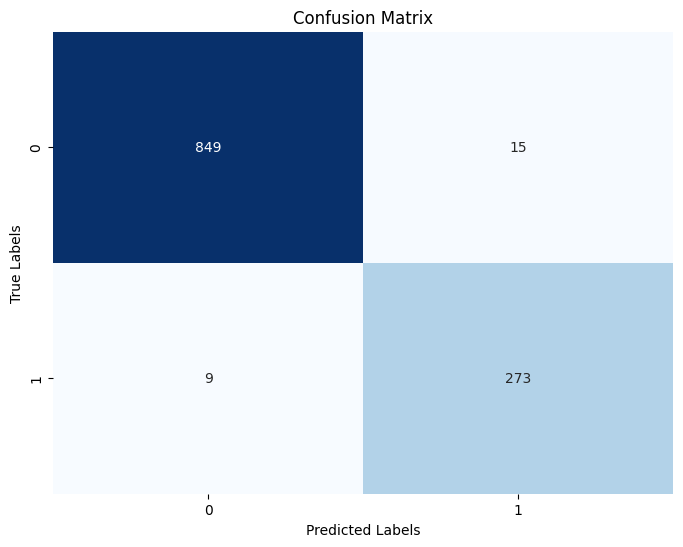

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.99       864
     Class 1       0.95      0.97      0.96       282

    accuracy                           0.98      1146
   macro avg       0.97      0.98      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [18]:
evaluate_model(best_model, test_X, test_y)